In [1]:
# Update sklearn to prevent version mismatches
# !conda install scikit-learn
# !conda update scikit-learn
# !conda install joblib 
# !conda update joblib 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [3]:
# Drop the null columns where all values are null
df = pd.read_csv("clean_2019.csv")
df = df.dropna(axis='columns', how='all')

In [4]:
new_df=df.drop(['country','happiness_rank'],axis=1)
new_df = new_df.apply(lambda x: x.fillna(0),axis=0)
new_df.head()

,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_corr
0,2.853,0.306,0.575,0.295,0.010,0.202,0.091
1,3.083,0.026,0.000,0.105,0.225,0.235,0.035
2,3.203,0.350,0.517,0.361,0.000,0.158,0.025
3,3.231,0.476,0.885,0.499,0.417,0.276,0.147
4,3.334,0.359,0.711,0.614,0.555,0.217,0.411


In [5]:
new_df.describe()

,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_corr
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# Create a Train Test Split


In [6]:
X = new_df.drop("happiness_score", axis=1)
y = new_df.happiness_score
print(X.shape, y.shape)
X

(156, 6) (156,)


,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_corr
0,0.306,0.575,0.295,0.010,0.202,0.091
1,0.026,0.000,0.105,0.225,0.235,0.035
2,0.350,0.517,0.361,0.000,0.158,0.025
3,0.476,0.885,0.499,0.417,0.276,0.147
4,0.359,0.711,0.614,0.555,0.217,0.411
...,...,...,...,...,...,...
151,1.396,1.522,0.999,0.557,0.322,0.298
152,1.380,1.624,1.026,0.591,0.354,0.118
153,1.488,1.582,1.028,0.603,0.271,0.341
154,1.383,1.573,0.996,0.592,0.252,0.410


In [7]:
y

0      2.853
1      3.083
2      3.203
3      3.231
4      3.334
       ...  
151    7.488
152    7.494
153    7.554
154    7.600
155    7.769
Name: happiness_score, Length: 156, dtype: float64

# Train test_split to create training and testing data


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#creating the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_n = LinearRegression()

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data 
model_n.fit(X_train, y_train)
training_score = model_n.score(X_train, y_train)
testing_score = model_n.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7685438552559285
Testing Score: 0.8089648421597913


In [11]:
print("Intercept", model_n.intercept_)

Intercept 1.8539910898466916


In [12]:
print("Coefficients", model_n.coef_)

Coefficients [0.94570964 1.00689959 0.92466226 1.78787977 0.24101878 0.6975058 ]


In [13]:
coef = zip(X.columns, model_n.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, model_n.coef_)), columns=["Features","Coefficients"])
coef_df

,Features,Coefficients
0,gdp_per_capita,0.945710
1,social_support,1.006900
2,life_expectancy,0.924662
3,freedom,1.787880
4,generosity,0.241019
5,government_corr,0.697506


# Regression Equation
# Happiness Score= 1.8539910898466916 + 0.945710*gdp_per_capita +1.006900*social_support +1.006900*life_expectancy + 1.787880*freedom +0.241019*generosity + 0.697506*government_corr


Text(0.5, 1.0, 'Residual Plot')

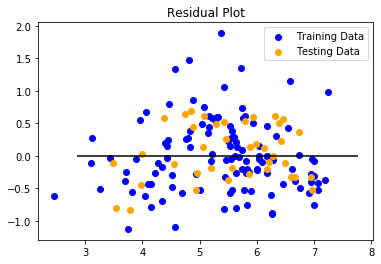

In [14]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model_n.predict(X_train), model_n.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model_n.predict(X_test), model_n.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [15]:
from __future__ import division
import seaborn as sns

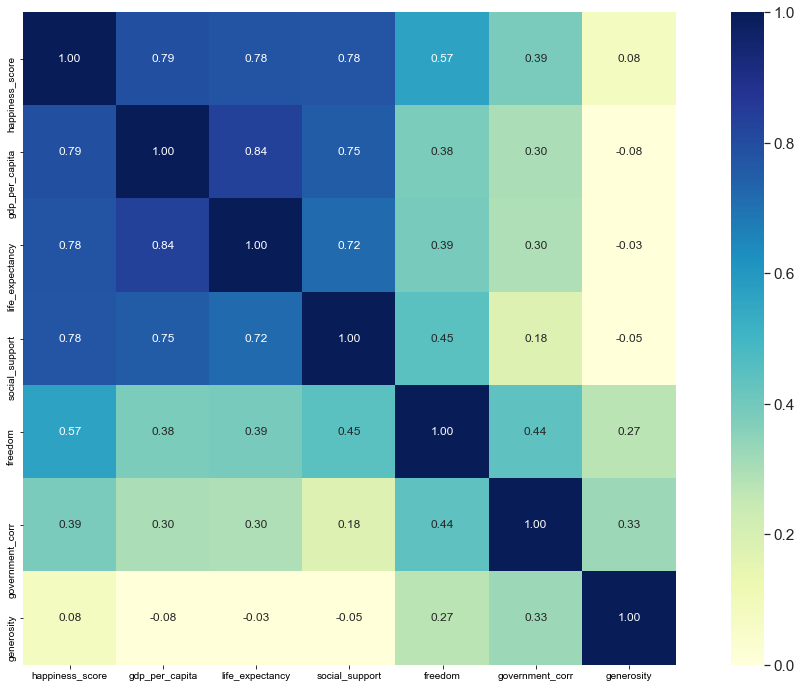

In [16]:
#number of variables for heatmap
k = 7
corrmat = new_df.corr()
cols = corrmat.nlargest(k, "happiness_score")["happiness_score"].index
cm = np.corrcoef(new_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 12))
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols.values, xticklabels=cols.values,vmax=1, vmin=0, cmap='YlGnBu')
hm.set_ylim([7,0])
g0 = plt.show()

In [17]:
f.savefig('sns_heatmap.jpg')

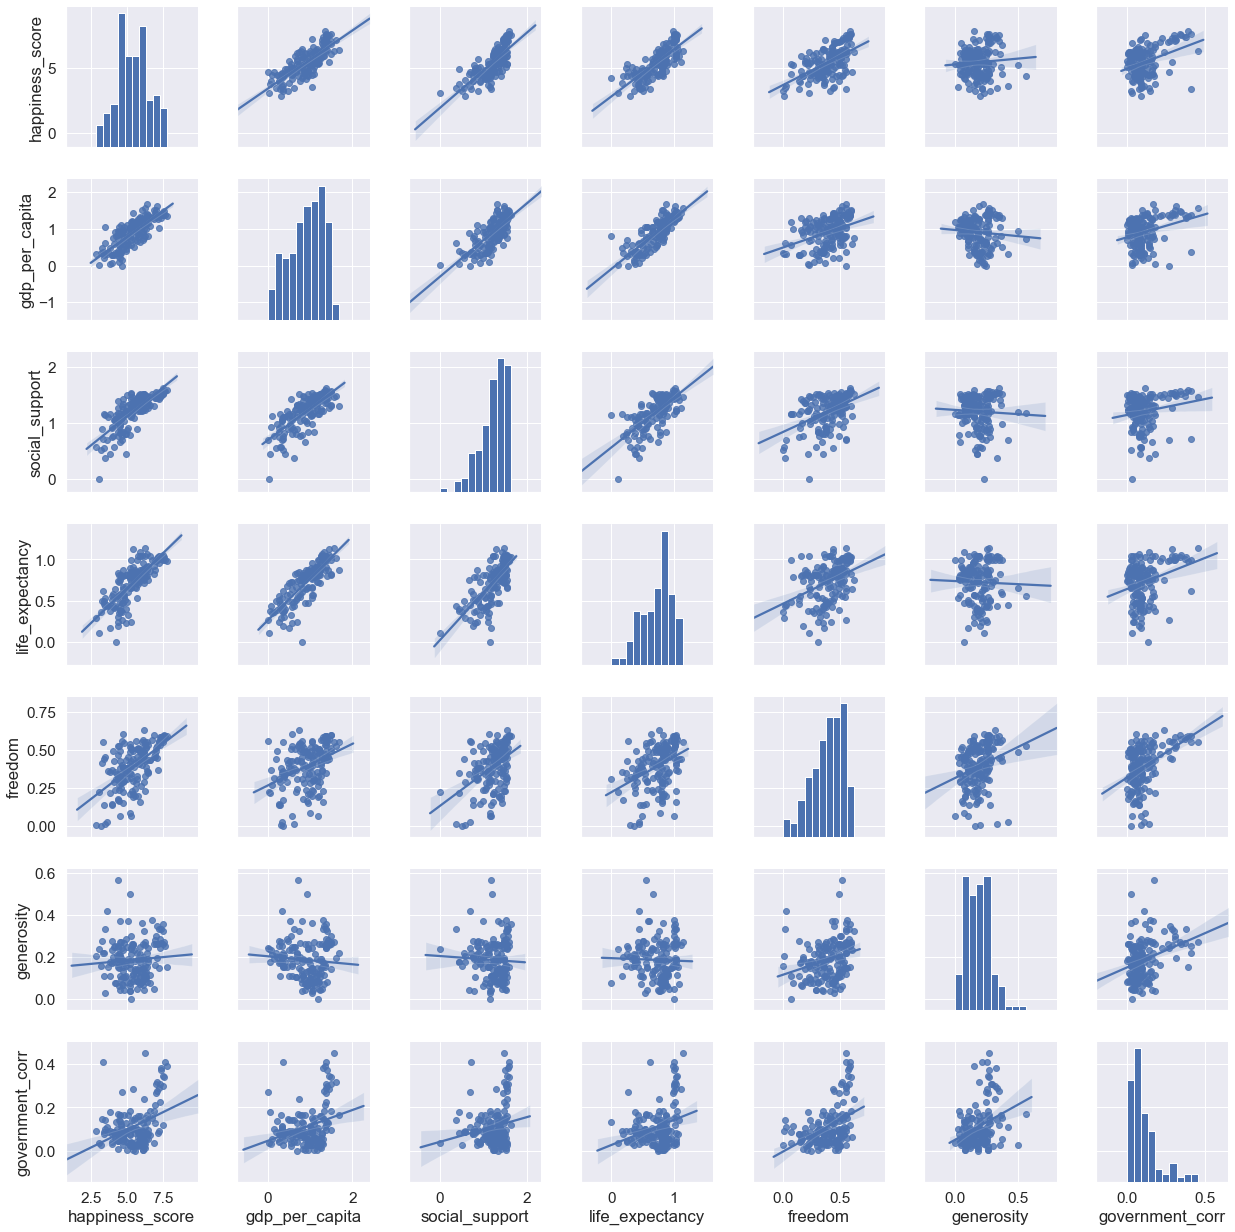

In [18]:
# with regression
g1 = sns.pairplot(new_df, kind="reg")
# plt.show()

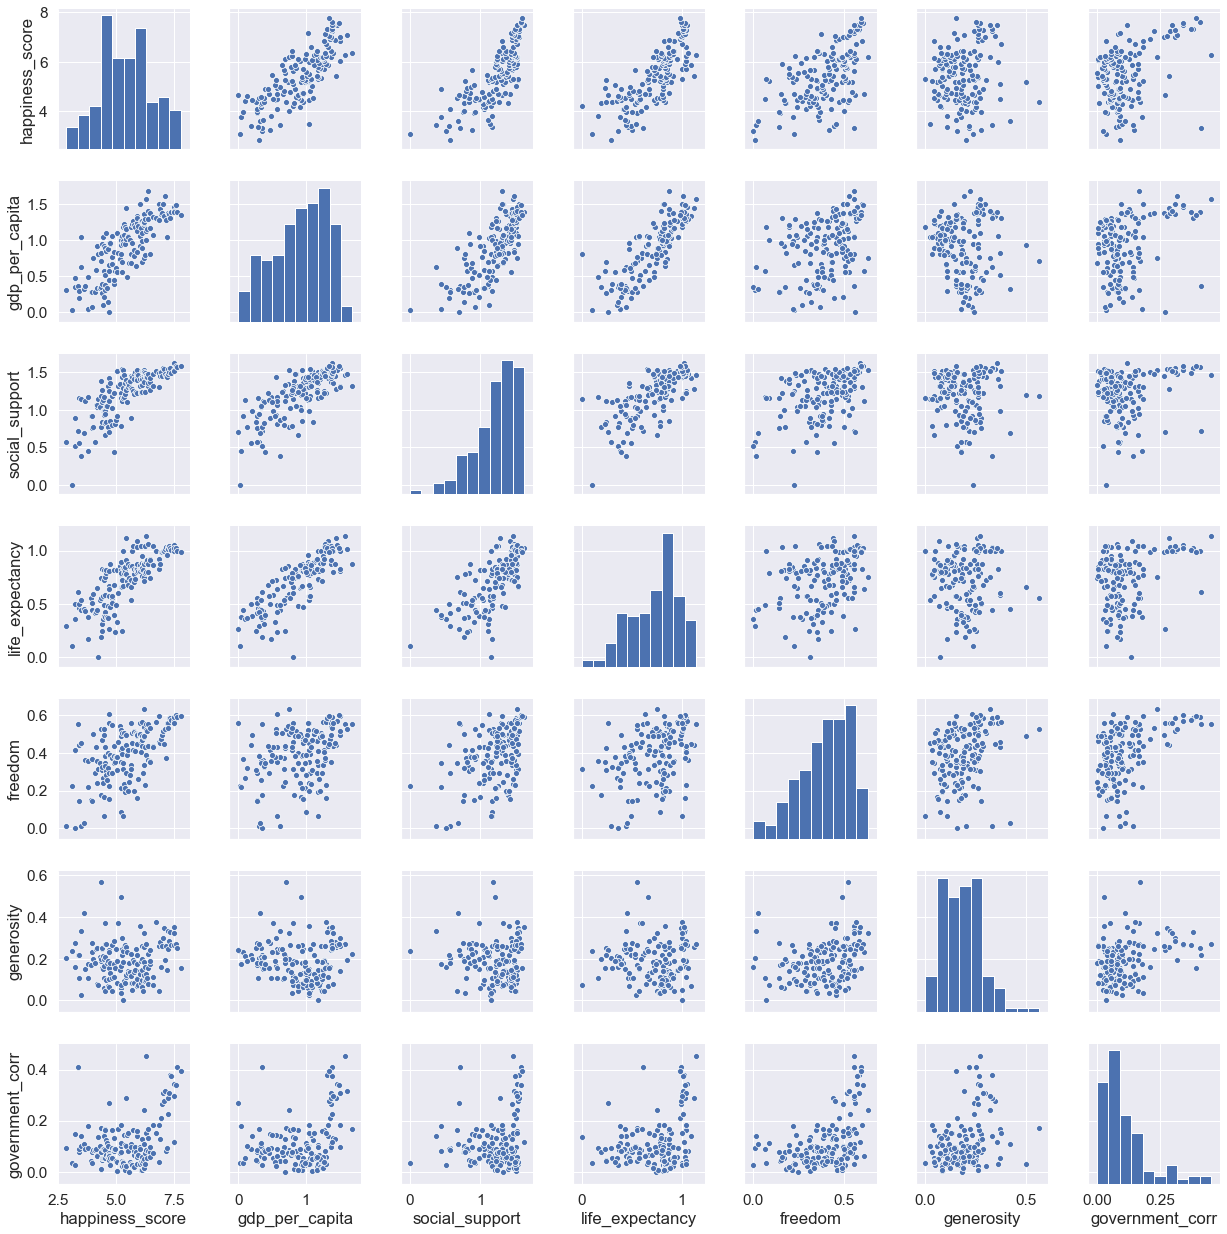

In [19]:
 # without regression
g2 = sns.pairplot(new_df, kind="scatter")
# plt.show()

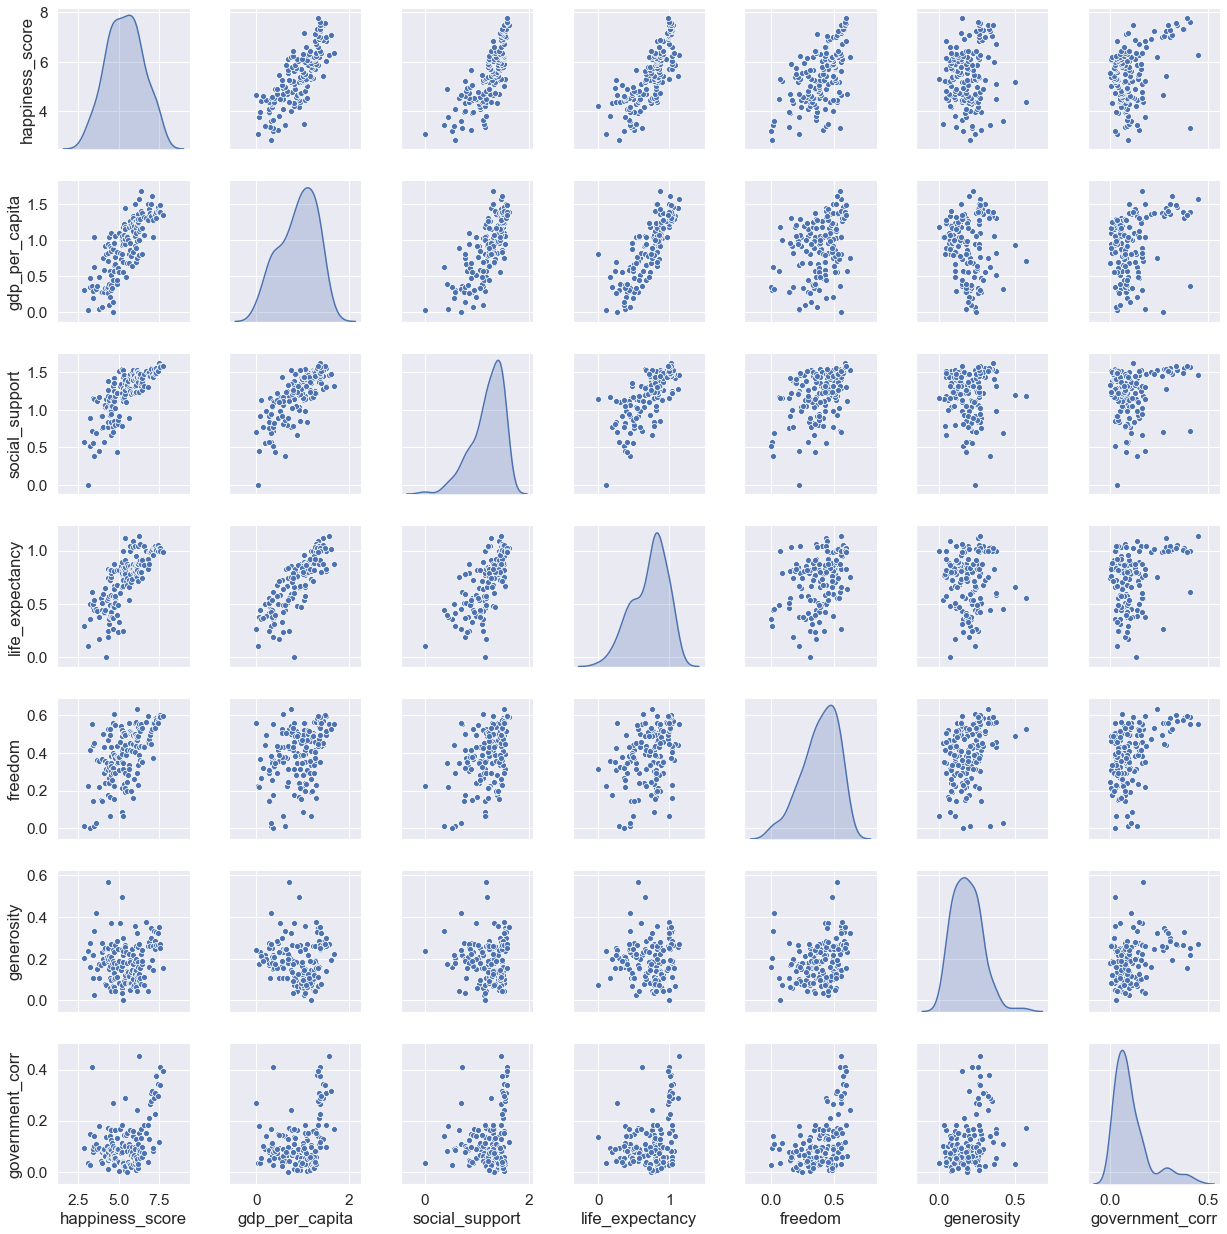

In [20]:
g3 = sns.pairplot(new_df, diag_kind="kde")


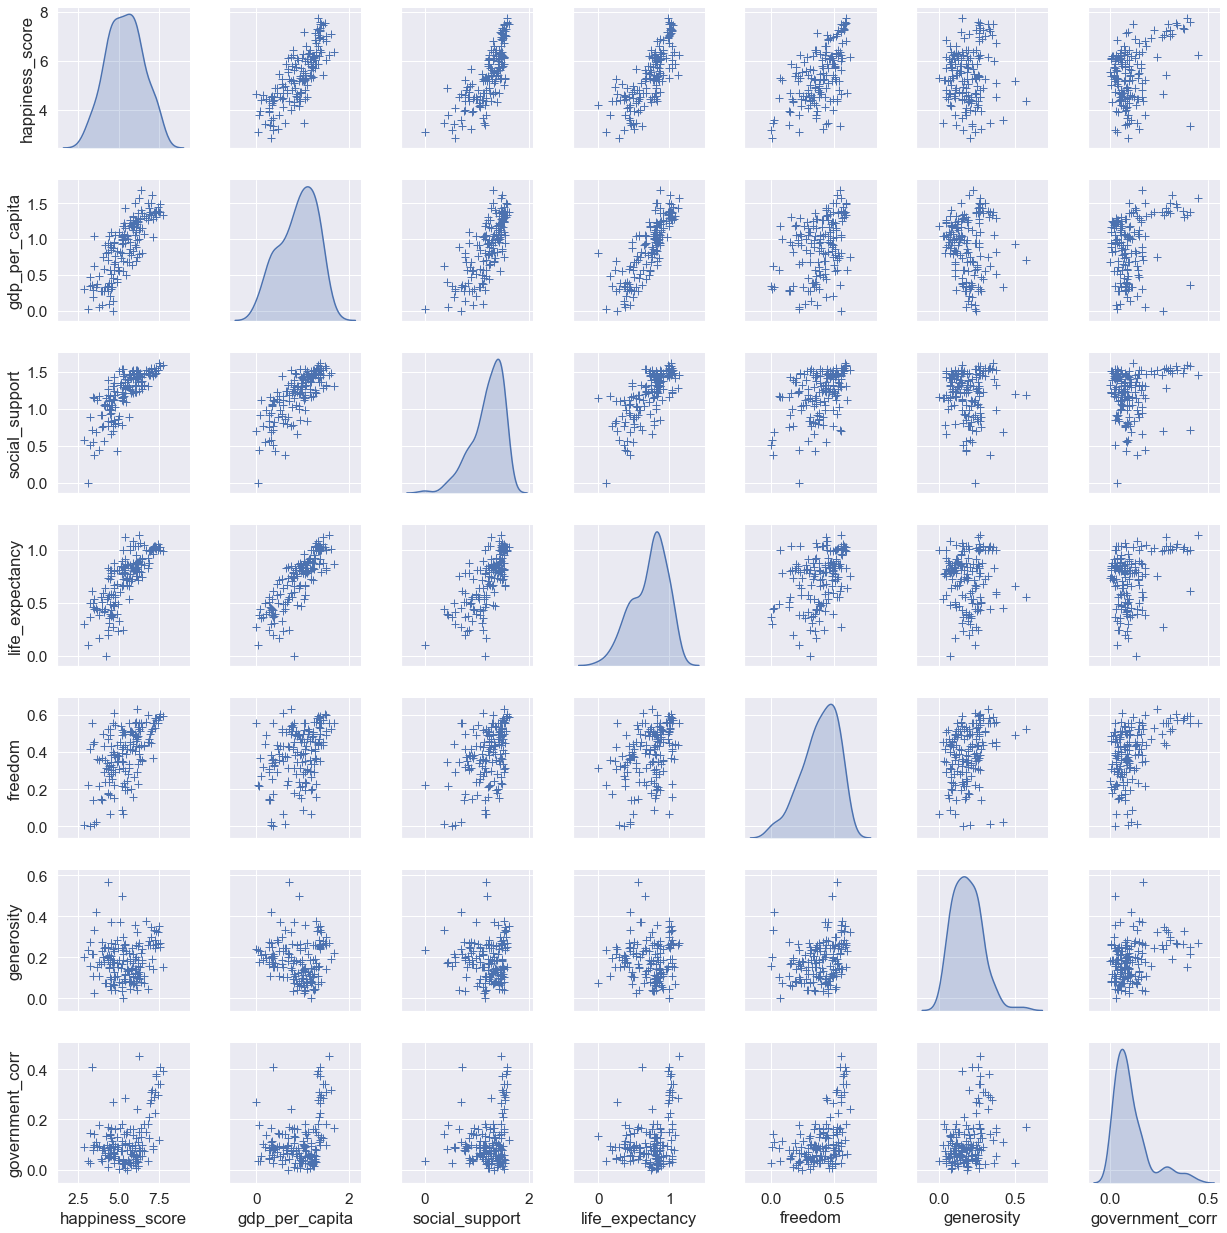

In [21]:
g4 = sns.pairplot(new_df, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))